<a href="https://www.kaggle.com/code/jaikrishna612/braintumor-detection?scriptVersionId=111573581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Brain Tumor detection using VGG16 Deep Learning architecture

**Importing necessary Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

**converting categorical labels to numeric codes**

In [2]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1]]) 

OneHotEncoder()

**Loading Data**

In [3]:
input_path = []
label = []

In [4]:
data = []
paths = []
result = []
for r,d,f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Tumor","Tumor",path))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
paths = []
for r,d,f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("No Tumor","No Tumor",path))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
len(input_path)

139

In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,No Tumor/No Tumor/../input/brain-mri-images-fo...,1
1,Tumor/Tumor/../input/brain-mri-images-for-brai...,0
2,No Tumor/No Tumor/../input/brain-mri-images-fo...,1
3,No Tumor/No Tumor/../input/brain-mri-images-fo...,1
4,Tumor/Tumor/../input/brain-mri-images-for-brai...,0


In [8]:
pd.unique(df['label'])

array([1, 0])

**Count of each category**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

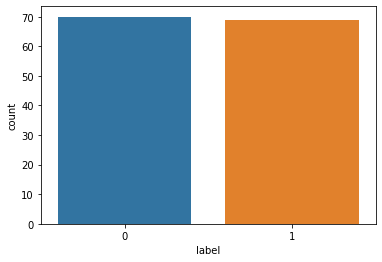

In [9]:
import seaborn as sns
sns.countplot(df['label'])

In [10]:
print(np.array(result))

[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0

In [11]:
result = np.array(result)
result = result.reshape(139,2)

In [12]:
result.shape

(139, 2)

In [13]:
data = np.array(data)
#data = data.reshape(139, 128, 128, 3)
data.shape

(139, 224, 224, 3)

**Displaying random images**

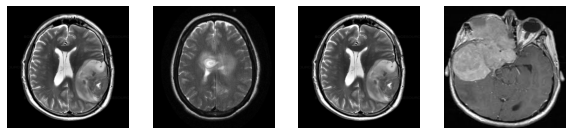

In [14]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

**Splitting data into training and testing data**

In [15]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 1)

In [16]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (104, 224, 224, 3)
x_test Shape :  (35, 224, 224, 3)
y_train Shape:  (104, 2)
y_test Shape:  (35, 2)


**Pre-Trained VGG16 model**

In [19]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

2022-11-20 17:56:16.178940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 17:56:16.290340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 17:56:16.291175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 17:56:16.292675: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 2s 0us/step


In [20]:
for layer in modelVGG.layers:
    layer.trainable = False

In [21]:
num_classes = 2
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        #top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(2,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [22]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [23]:
num_classes = 2
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

**Summary of the network layers**

In [24]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Fitting the Model**

In [25]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 15 , validation_data = (x_test , y_test), verbose = 1 , initial_epoch = 0)

Epoch 1/15


2022-11-20 17:56:21.347722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-20 17:56:22.785042: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


4/4 [==============================] - 11s 627ms/step - loss: 14.3306 - accuracy: 0.4519 - val_loss: 4.7753 - val_accuracy: 0.3714
Epoch 2/15
4/4 [==============================] - 0s 76ms/step - loss: 2.5959 - accuracy: 0.5962 - val_loss: 0.6682 - val_accuracy: 0.8571
Epoch 3/15
4/4 [==============================] - 0s 76ms/step - loss: 0.8177 - accuracy: 0.7404 - val_loss: 0.5746 - val_accuracy: 0.8571
Epoch 4/15
4/4 [==============================] - 0s 77ms/step - loss: 0.3390 - accuracy: 0.8654 - val_loss: 1.3343 - val_accuracy: 0.5429
Epoch 5/15
4/4 [==============================] - 0s 75ms/step - loss: 0.2848 - accuracy: 0.8558 - val_loss: 0.4520 - val_accuracy: 0.8286
Epoch 6/15
4/4 [==============================] - 0s 76ms/step - loss: 0.1697 - accuracy: 0.9231 - val_loss: 0.3177 - val_accuracy: 0.9143
Epoch 7/15
4/4 [==============================] - 0s 75ms/step - loss: 0.1160 - accuracy: 0.9712 - val_loss: 0.5715 - val_accuracy: 0.8286
Epoch 8/15
4/4 [===================

In [26]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

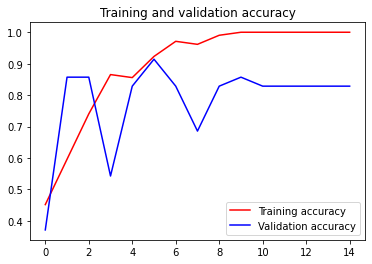

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [28]:
def names(number):
    if number==0:
        return "It's a TUMOR"
    else:
        return "It's NOT a Tumor"

**Testing the model on a random image**

98.05915951728821% Confidence It's a TUMOR


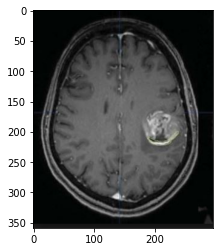

In [29]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y19.JPG")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))